В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Load the data into a pandas DataFrame
file_path = '/Users/andriannakis/Downloads/cars.csv'
print("File exists:", os.path.exists(file_path))
df = pd.read_csv(file_path)

File exists: True


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
# Display the first 5 records
print("First 5 records of the dataset:")
print(df.head())

First 5 records of the dataset:
   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000  


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
# ?pd.DataFrame.info

In [4]:
# Output the data types of each column
print("\nColumn Data Types:")
print(df.dtypes)

# Check the unique values in each column to investigate data types and values
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Investigate each column with 'object' type to see what types and values are contained within
print("\nInvestigation of Categorical Columns:")
for col in categorical_columns:
    unique_values = df[col].unique()
    num_unique_values = df[col].nunique()
    print(f"\nColumn '{col}' has {num_unique_values} unique values:")
    print(f"Unique Values: {unique_values}")

# Summary of numerical and categorical columns
num_numerical = len(numerical_columns)
num_categorical = len(categorical_columns)

# Further classification of categorical columns
binary_columns = []
multi_cat_unordered_columns = []
multi_cat_ordered_columns = []

# Define any columns with known order if applicable, for example:
ordered_categories = {
    "Owner_Type": ["First", "Second", "Third"]  # Order defined for 'Owner_Type' column
}


for col in categorical_columns:
    unique_values = df[col].unique()
    num_unique_values = df[col].nunique()
    
    # Binary columns: only 2 unique values
    if num_unique_values == 2:
        binary_columns.append(col)
    
    # Multi-categorical columns with more than 2 unique values
    elif num_unique_values > 2:
        # Check if a known order is defined for this column
        if col in ordered_categories:
            multi_cat_ordered_columns.append(col)
        else:
            multi_cat_unordered_columns.append(col)

# Conclusion
print("\nConclusion:")
print(f"The dataset contains {num_numerical} numerical and {num_categorical} categorical columns.")
print(f"{len(binary_columns)} binary (having only 2 values): {binary_columns}")
print(f"{len(multi_cat_unordered_columns)} multi-categorical (more than 2 values) with unordered values: {multi_cat_unordered_columns}")
print(f"{len(multi_cat_ordered_columns)} columns where an order can be established: {multi_cat_ordered_columns}")



Column Data Types:
Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

Investigation of Categorical Columns:

Column 'Brand' has 11 unique values:
Unique Values: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']

Column 'Model' has 58 unique values:
Unique Values: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tig

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [5]:
X = df.drop(columns=['Price'])  # Drop the target column to get the features
y = df['Price']  # Target variable

# Split the data into training and testing sets with 80/20 split and random_state=12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Display the shapes of the resulting datasets to verify
print("Training and Testing Set Shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Training and Testing Set Shapes:
X_train shape: (80, 12)
X_test shape: (20, 12)
y_train shape: (80,)
y_test shape: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [6]:
# Step 1: Binary encoding for Fuel_Type and Transmission
for col in ['Fuel_Type', 'Transmission']:
    most_frequent_category = X_train[col].value_counts().idxmax()
    X_train[col + '_Code'] = (X_train[col] == most_frequent_category).astype(int)
    X_test[col + '_Code'] = (X_test[col] == most_frequent_category).astype(int)

# Drop the original columns after encoding
X_train = X_train.drop(columns=['Fuel_Type', 'Transmission'])
X_test = X_test.drop(columns=['Fuel_Type', 'Transmission'])

# Step 2: OneHot Encoding for Brand column
brand_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_brand_encoded = brand_encoder.fit_transform(X_train[['Brand']])
X_test_brand_encoded = brand_encoder.transform(X_test[['Brand']])

# Convert OneHotEncoded data into DataFrames
brand_encoded_columns = brand_encoder.get_feature_names_out(['Brand'])
X_train_brand_df = pd.DataFrame(X_train_brand_encoded.toarray(), columns=brand_encoded_columns, index=X_train.index)
X_test_brand_df = pd.DataFrame(X_test_brand_encoded.toarray(), columns=brand_encoded_columns, index=X_test.index)

# Concatenate the OneHotEncoded columns to the original datasets
X_train = pd.concat([X_train.drop(columns=['Brand']), X_train_brand_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['Brand']), X_test_brand_df], axis=1)


In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [8]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,First,17,1968,187,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,First,15,1984,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,Second,15,1395,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,Third,20,1086,68,5,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,Third,20,1194,94,5,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Model Counts:
            Model  Count
0         Mustang      3
1          Altroz      3
2         C-Class      3
3           Verna      3
4        Fortuner      2
5         S-Cross      2
6          Vitara      2
7            WR-V      2
8            Ameo      2
9              A3      2
10       7 Series      2
11            GLE      2
12          Yaris      2
13         Ranger      2
14         Santro      2
15          Tigor      2
16          T-Roc      2
17           BR-V      2
18        Elantra      2
19             Q7      2
20             X5      2
21            GLA      2
22          Camry      2
23          Venue      2
24          Tiago      2
25         XUV300      2
26          Vento      2
27             A5      2
28       3 Series      2
29  Innova Crysta      2
30         Safari      2
31       EcoSport      2
32         Aspire      2
33        E-Class      2
34             X3      2
35             A6      2
36         Passat      2
37           Thar      2
38         

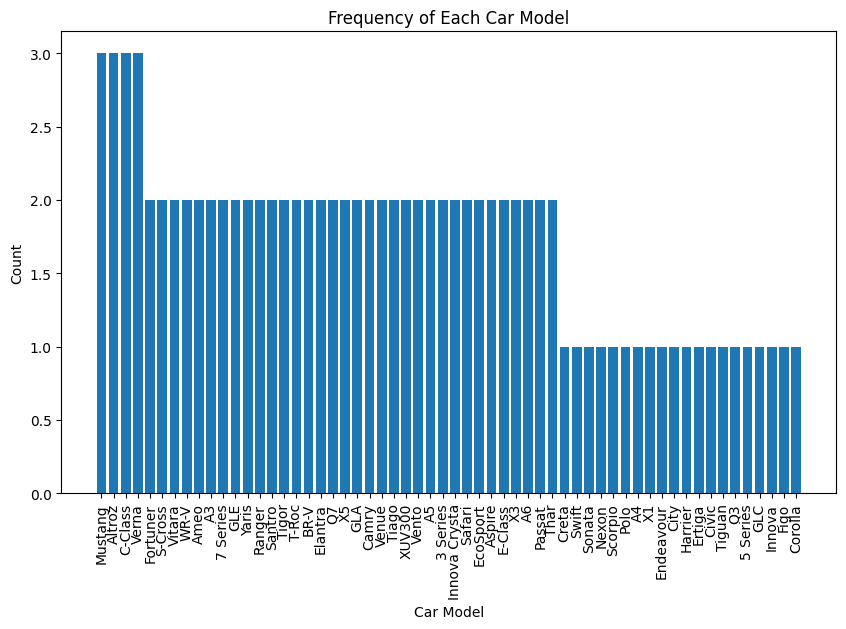

In [9]:
# Step 1: Count the occurrences of each model
model_counts = df['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

# Step 2: Display the counts for each model
print("Model Counts:")
print(model_counts)

# Step 3: Plot the counts as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_counts['Model'], model_counts['Count'])
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.title('Frequency of Each Car Model')
plt.xticks(rotation=90)  # Rotate model names for readability
plt.show()

As we can see from the graph, we have counts ranging from 1 to 3. Therefore, we will have 3 clusters of 'Model' column based on frequency in original dataset. 

But we can also use silhouette_score to choose the right number of clusters (categories) for 'Model'.

/Users/andriannakis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/andriannakis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/andriannakis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/andriannakis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (3) found smaller than n

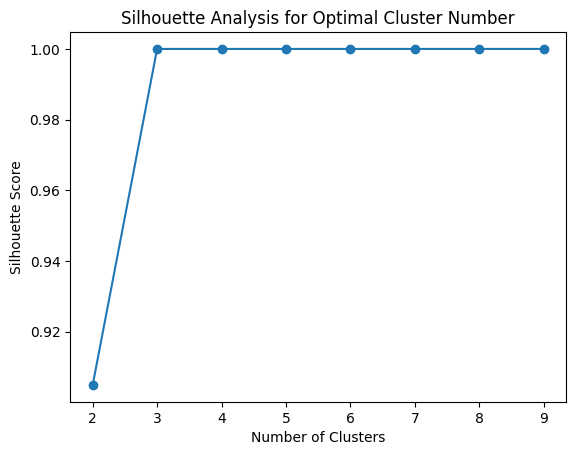

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Step 1: Initialize lists to store the number of clusters and corresponding silhouette score
cluster_range = range(2, 10)  # Testing from 2 to 10 clusters
silhouette_scores = []

# Step 2: Loop over different numbers of clusters and calculate the silhouette score
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(model_counts[['Count']])
    silhouette_avg = silhouette_score(model_counts[['Count']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 3: Plot the silhouette scores to find the optimal number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Cluster Number')
plt.show()

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [11]:
# Select only numerical columns from X_train
X_train = X_train.select_dtypes(exclude=object)
concat_X = pd.concat([X_train, y_train], axis=1)

# Calculate and display the correlation matrix
corr = concat_X.corr()
corr.style.background_gradient(cmap='coolwarm')
     

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_Code,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_Code,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Brand_BMW,0.048335,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.477522


In order to fit the correlation matrix in screen size, we can display it as a heatmap for better visibility.

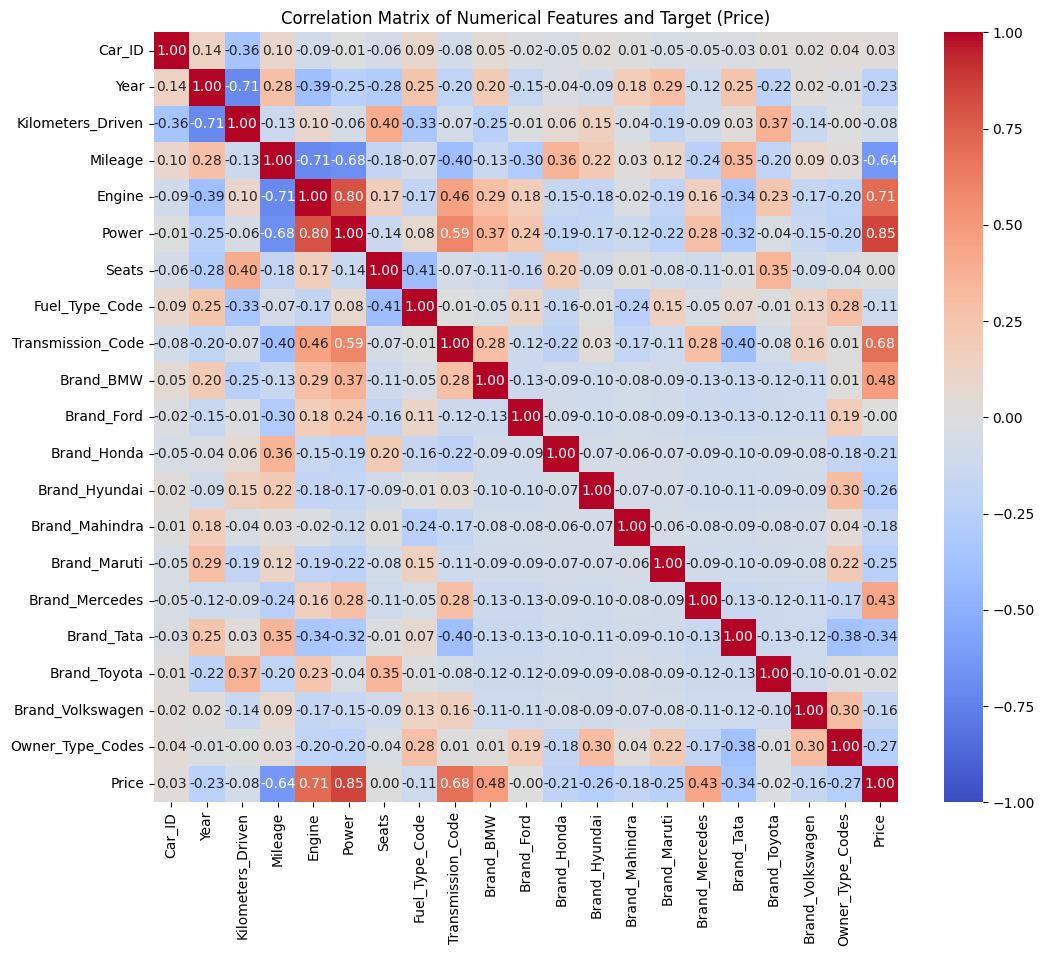

In [12]:
# Visualise the correlation matrix as heatmap
import seaborn as sns

# Set the figure size to adjust cell size in the heatmap
plt.figure(figsize=(12, 10))  

# Draw the heatmap with adjusted cell size and annotations
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features and Target (Price)")
plt.show()

**Conclusion:**

Three values have positive correlation with 'Price' greater than 0.5, namely 'Engine' (0.71), 'Power' (0.84), and 'Transmission code' (0.68). One value has negative correlation with 'Price' greater than 0.5 in absolute value, that is 'Mileage' (-0.63).

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

Training RMSE: 210293.5782815185
Test RMSE: 258181.56112032218


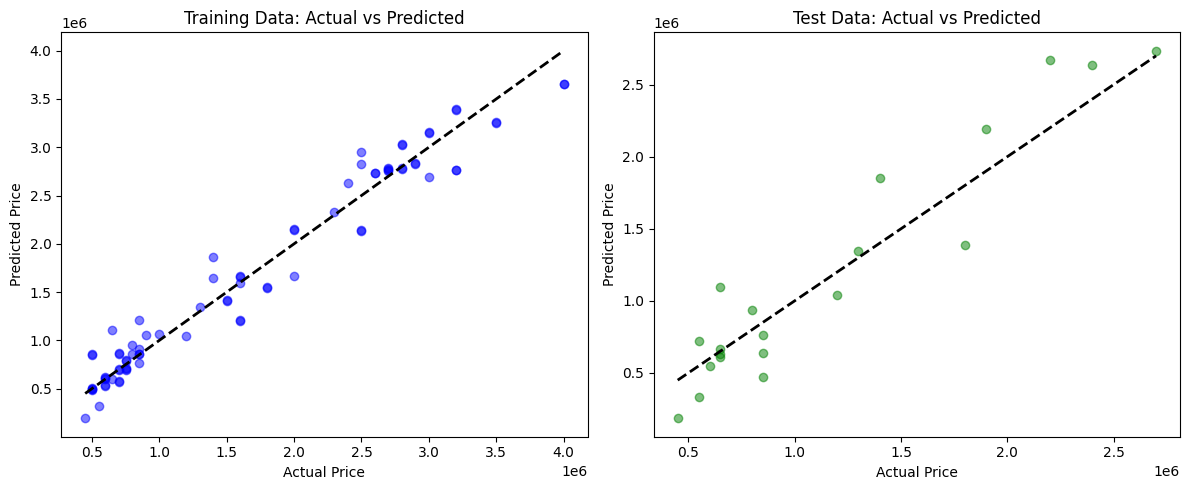

In [13]:
# Step 1: Remove all non-numerical columns if not done already
X_train_numerical = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numerical = X_test.select_dtypes(include=['int64', 'float64'])
#or X_test = X_test.select_dtypes(exclude=object)

# Step 2: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_numerical, y_train)

# Step 3: Make predictions on training and test data
y_train_pred = model.predict(X_train_numerical)
y_test_pred = model.predict(X_test_numerical)

# Step 4: Calculate RMSE for training and test predictions
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Step 5: Plot predictions vs. actual values for training data
plt.figure(figsize=(12, 5))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Training Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()

**Observations:**

1. The RMSE on the training data is lower than the test RMSE, which is expected as the model typically fits better on the training data than on unseen test data. 
2. However, the difference between these two RMSE values isn’t excessively large, suggesting the model is not overfitting too severely.

**Conclusion:**

The model performs reasonably well but shows some decline in accuracy on the test data, indicated by a higher RMSE and greater scatter from the prediction line. This suggests that the model may be slightly underfitting or could benefit from additional feature engineering, parameter tuning, or a more complex model structure to improve its predictive power.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [14]:
# Step 1: Scale the independent variables using StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Step 2: Train the Linear Regression model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 3: Get model coefficients
coefficients = model.coef_
feature_names = X_train_numerical.columns

# Calculate the absolute values of the coefficients
absolute_coefficients = np.abs(coefficients)

# Calculate feature weight as a percentage of the total contribution
total_contribution = absolute_coefficients.sum()
feature_weights = (absolute_coefficients / total_contribution) * 100

# Create a DataFrame with feature names, coefficients, and weights
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': absolute_coefficients,
    'Feature Weight (%)': feature_weights
})

# Sort the DataFrame by the absolute value of coefficients
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted coefficients with feature weights
display(coef_df)

# Step 4: Analyze direction of the coefficients
print("Coefficients indicating direction of influence on the target variable:")
for index, row in coef_df.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']} {direction} (Price) by {abs(row['Coefficient']):.2f} units "
          f"with a weight of {row['Feature Weight (%)']:.2f}%.")

,Feature,Coefficient,Absolute Coefficient,Feature Weight (%)
5,Power,496769.214899,496769.214899,14.819775
10,Brand_Ford,-334761.655121,334761.655121,9.986715
12,Brand_Hyundai,-332815.861280,332815.861280,9.928667
16,Brand_Tata,-292649.105520,292649.105520,8.730400
13,Brand_Mahindra,-290310.207388,290310.207388,8.660625
18,Brand_Volkswagen,-286620.547297,286620.547297,8.550554
14,Brand_Maruti,-278152.872913,278152.872913,8.297944
11,Brand_Honda,-228645.911279,228645.911279,6.821037
17,Brand_Toyota,-189794.446257,189794.446257,5.662008
7,Fuel_Type_Code,-183848.018909,183848.018909,5.484612


Coefficients indicating direction of influence on the target variable:
Power increases (Price) by 496769.21 units with a weight of 14.82%.
Brand_Ford decreases (Price) by 334761.66 units with a weight of 9.99%.
Brand_Hyundai decreases (Price) by 332815.86 units with a weight of 9.93%.
Brand_Tata decreases (Price) by 292649.11 units with a weight of 8.73%.
Brand_Mahindra decreases (Price) by 290310.21 units with a weight of 8.66%.
Brand_Volkswagen decreases (Price) by 286620.55 units with a weight of 8.55%.
Brand_Maruti decreases (Price) by 278152.87 units with a weight of 8.30%.
Brand_Honda decreases (Price) by 228645.91 units with a weight of 6.82%.
Brand_Toyota decreases (Price) by 189794.45 units with a weight of 5.66%.
Fuel_Type_Code decreases (Price) by 183848.02 units with a weight of 5.48%.
Mileage decreases (Price) by 131715.51 units with a weight of 3.93%.
Transmission_Code increases (Price) by 116693.77 units with a weight of 3.48%.
Kilometers_Driven decreases (Price) by 9439

**Conclusion:** 

Based on the feature importance analysis in absolute values, Power is the most significant positive predictor of price, with the highest weight (14.82%), indicating that increases in power strongly correlate with price increases. Several car brands (e.g., Ford, Hyundai, Tata) also have high weights but negatively impact the price, showing that brand choice is crucial in determining car value. Features like Mileage and Fuel Type also impact price but to a lesser extent. Minor features, such as Year and Seats, have minimal influence on price. Overall, power, brand, and key specifications like mileage and fuel type are primary drivers of price.


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [15]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Add a constant to the features (for the intercept term)
X_train_scaled_with_const = sm.add_constant(X_train_scaled)

# Step 2: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

# Display VIF values
display(vif_data)

# Step 3: Drop features with VIF > 5 
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
X_train_scaled_reduced = X_train_numerical.drop(columns=high_vif_features)

# Re-scale the reduced feature set
X_train_scaled_reduced = scaler.fit_transform(X_train_scaled_reduced)
X_train_scaled_reduced_with_const = sm.add_constant(X_train_scaled_reduced)

# Step 4: Train the linear regression model using statsmodels with reduced features
model_sm = sm.OLS(y_train, X_train_scaled_reduced_with_const)
results = model_sm.fit()

# Step 5: Output the summary report with reduced features
summary_df = results.summary2().tables[1]
display(summary_df)

# Step 6: Identify statistically significant features
significant_features = []
p_values = results.pvalues[1:]  # Skip the constant term

for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        significant_features.append(X_train_numerical.columns[i])

# Display significant features
display("Statistically significant features at the 0.05 significance level:")
display(significant_features)

results = model_sm.fit()
results.params
print(results.summary())

,Feature,VIF
0,Car_ID,1.519303
1,Year,4.947899
2,Kilometers_Driven,5.660745
3,Mileage,4.536136
4,Engine,7.086905
5,Power,7.586376
6,Seats,2.375587
7,Fuel_Type_Code,2.781581
8,Transmission_Code,2.580864
9,Brand_BMW,3.098834


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.680000e+06,40050.308413,41.947243,3.173847e-47,1.599941e+06,1.760059e+06
x1,6.794859e+04,42423.187525,1.601685,1.143086e-01,-1.685415e+04,1.527513e+05
x2,-3.289579e+04,54481.631082,-0.603796,5.481822e-01,-1.418030e+05,7.601144e+04
x3,-3.292453e+05,68401.176117,-4.813445,9.895636e-06,-4.659773e+05,-1.925133e+05
x4,-6.747772e+04,60084.521192,-1.123047,2.657477e-01,-1.875850e+05,5.262953e+04
x5,-9.704838e+04,58040.417906,-1.672083,9.954788e-02,-2.130695e+05,1.897276e+04
x6,2.822582e+05,57809.961460,4.882519,7.690082e-06,1.666978e+05,3.978187e+05
x7,1.429661e+05,64620.275154,2.212403,3.063111e-02,1.379199e+04,2.721402e+05
x8,-2.251483e+05,68785.637577,-3.273187,1.741094e-03,-3.626488e+05,-8.764773e+04
x9,-1.875034e+05,61608.545583,-3.043464,3.428286e-03,-3.106571e+05,-6.434969e+04


'Statistically significant features at the 0.05 significance level:'

['Kilometers_Driven',
 'Power',
 'Seats',
 'Fuel_Type_Code',
 'Transmission_Code',
 'Brand_BMW',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Mahindra',
 'Brand_Maruti',
 'Brand_Mercedes']

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     35.55
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.48e-25
Time:                        04:52:29   Log-Likelihood:                -1126.4
No. Observations:                  80   AIC:                             2289.
Df Residuals:                      62   BIC:                             2332.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   4.01e+04     41.947      0.0

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [16]:
# Step 1: Filter X_train_scaled to include only significant features
X_train_significant = X_train_scaled[:, [i for i, p_value in enumerate(p_values[1:]) if p_value < 0.05]]
X_train_significant_with_const = sm.add_constant(X_train_significant)  # Add intercept

# Step 2: Train the model using only significant features
model_sm_significant = sm.OLS(y_train, X_train_significant_with_const)
results_significant = model_sm_significant.fit()

# Step 3: Output the summary report for the model with significant features
summary_significant_df = results_significant.summary2().tables[1]
display(summary_significant_df)  # Display the summary of the new model

# Step 4: Compare R-squared and Adjusted R-squared values
print("Original model R-squared:", results.rsquared)
print("Original model Adjusted R-squared:", results.rsquared_adj)
print("Significant features model R-squared:", results_significant.rsquared)
print("Significant features model Adjusted R-squared:", results_significant.rsquared_adj)


# or if we want a full sumarry, we can use following commands:
# results = model_sm_significant.fit()
# results.params
# print(results.summary())

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.680000e+06,45160.941369,37.200287,6.223701e-47,1.589883e+06,1.770117e+06
x1,-2.398331e+03,59636.601468,-0.040216,9.680390e-01,-1.214013e+05,1.166047e+05
x2,-3.306163e+04,92117.700784,-0.358906,7.207771e-01,-2.168796e+05,1.507564e+05
x3,7.178010e+05,101600.997091,7.064902,1.083684e-09,5.150594e+05,9.205427e+05
x4,2.479410e+04,56434.874866,0.439340,6.618081e-01,-8.781994e+04,1.374081e+05
x5,-1.593767e+05,54995.695679,-2.897985,5.050250e-03,-2.691189e+05,-4.963451e+04
x6,2.247181e+05,61001.856399,3.683792,4.568911e-04,1.029908e+05,3.464454e+05
x7,1.146534e+05,55095.821717,2.080983,4.120438e-02,4.711440e+03,2.245954e+05
x8,-1.427671e+05,52147.713416,-2.737745,7.888637e-03,-2.468263e+05,-3.870799e+04
x9,-1.777963e+05,48080.264506,-3.697906,4.362758e-04,-2.737390e+05,-8.185364e+04


Original model R-squared: 0.9069618077743494
Original model Adjusted R-squared: 0.8814513357124775
Significant features model R-squared: 0.8702543729988583
Significant features model Adjusted R-squared: 0.8492661098074972


**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [17]:
# Step 1: Filter X_train_scaled to include only features with p-value < 0.25
X_train_relaxed = X_train_scaled[:, [i for i, p_value in enumerate(p_values[1:]) if p_value < 0.25]]
X_train_relaxed_with_const = sm.add_constant(X_train_relaxed)  # Add intercept

# Step 2: Train the model using features with relaxed p-value criterion
model_sm_relaxed = sm.OLS(y_train, X_train_relaxed_with_const)
results_relaxed = model_sm_relaxed.fit()

# Step 3: Output the summary report for the model with relaxed feature selection
summary_relaxed_df = results_relaxed.summary2().tables[1]
display(summary_relaxed_df)  # Display the summary of the relaxed model

# Step 4: Compare R-squared and Adjusted R-squared values across models
print("Original model R-squared:", results.rsquared)
print("Original model Adjusted R-squared:", results.rsquared_adj)
print("Significant features model R-squared:", results_significant.rsquared)
print("Significant features model Adjusted R-squared:", results_significant.rsquared_adj)
print("Relaxed features model R-squared:", results_relaxed.rsquared)
print("Relaxed features model Adjusted R-squared:", results_relaxed.rsquared_adj)

# or if we want a full sumarry, we can use following commands:
# results = model_sm_relaxed.fit()
# results.params
# print(results.summary())

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.680000e+06,38633.132305,43.485990,2.630106e-50,1.602866e+06,1.757134e+06
x1,-1.017388e+04,51060.416839,-0.199252,8.426783e-01,-1.121193e+05,9.177153e+04
x2,-1.848704e+05,67319.316154,-2.746172,7.762614e-03,-3.192777e+05,-5.046304e+04
x3,-7.282955e+04,83141.984722,-0.875966,3.842255e-01,-2.388279e+05,9.316878e+04
x4,5.663700e+05,91715.371301,6.175301,4.597989e-08,3.832543e+05,7.494856e+05
x5,4.131745e+03,53551.433118,0.077155,9.387339e-01,-1.027871e+05,1.110506e+05
x6,-1.633068e+05,50975.162632,-3.203654,2.090405e-03,-2.650820e+05,-6.153159e+04
x7,1.853900e+05,52846.362062,3.508093,8.176894e-04,7.987878e+04,2.909011e+05
x8,1.962131e+05,50809.994091,3.861704,2.590349e-04,9.476771e+04,2.976586e+05
x9,-1.262740e+05,49228.715481,-2.565048,1.259695e-02,-2.245623e+05,-2.798572e+04


Original model R-squared: 0.9069618077743494
Original model Adjusted R-squared: 0.8814513357124775
Significant features model R-squared: 0.8702543729988583
Significant features model Adjusted R-squared: 0.8492661098074972
Relaxed features model R-squared: 0.9078444230281368
Relaxed features model Adjusted R-squared: 0.8896925669579213


**Conclusions:**

For commercial purposes, the Relaxed Features Model is likely the best choice because:

1. It provides a high Adjusted R-squared (0.8897), indicating it explains most of the variance without being overly complex.
2. It retains a high R-squared value close to the original model, ensuring predictive power while avoiding issues associated with including stricly significant features.
3. This model strikes a good balance between performance, interpretability, and stability, making it suitable for commercial use.

**The improved performance of the relaxed model (p-value <0.25) compared to the significant model (p-value <0.05) could be due to the following:**

**Inclusion of moderately relevant features:** Relaxing the p-value threshold allows to retain features that may not be highly significant individually (at p <0.05) but still contribute to the overall predictive power. 

**Model complexity and flexibility:** The relaxed model likely includes more features, which increases its complexity slightly. This added flexibility can help it better fit the training data without overfitting, provided the p-value threshold isn’t too loose.

**Adjusted R-squared’s role:** Adjusted R-squared rewards goodness-of-fit while penalizing the addition of irrelevant features. 